In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CLIP 유사도 Matrix

> 런타임 유형 꼭 GPU 설정하기

> 빈칸을 채우고 실행하는 문제입니다.



In [2]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-c7rytg7c
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-c7rytg7c
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 722.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install ftfy regex tqdm
!pip install seaborn

In [7]:
import os
import torch
import clip
from PIL import Image
import torch.nn.functional as F

# 1. 디바이스 설정
device = "cuda" if torch.cuda.is_available() else "cpu"

# 2. CLIP 모델 불러오기
model, preprocess = clip.load("ViT-B/32", device=device)

# 3. 이미지 파일 목록 (./images 폴더에 저장되어 있어야 함)
image_filenames = [
    "cat.jpg",
    "dog.jpg",
    "car.jpg",
    "pizza.jpg",
    "guitar.jpg"
]


image_paths = [os.path.join("/content/drive/MyDrive/사진", f) for f in image_filenames]

# 4. 텍스트 프롬프트
# 기존 텍스트 + distractor 프롬프트 추가
text_prompts = [
    "a photo of a cat",
    "a photo of a dog",
    "a photo of a car",
    "a photo of a pizza",
    "a photo of a guitar",
    "a photo of a horse",
    "a photo of a hamburger",
    "a photo of a piano"
]


# 5. 이미지 전처리 및 배치
image_tensors = [preprocess(Image.open(img_path).convert("RGB")) for img_path in image_paths]
print(f"image_tensors : {image_tensors}")

image_input = torch.stack(image_tensors).to(device)
print(f"image_input:{image_input}")
print(f"image_input.shape:{image_input.shape}")

# 6. 텍스트 토큰화
text_tokens = clip.tokenize(text_prompts).to(device)
print(f"text_tokens: {text_tokens}")
print(f"text_tokens.shape : {text_tokens.shape}")

# 7. 특징 추출 (with torch.no_grad for inference)
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_tokens)

# 8. 정규화 (cosine similarity 위해 L2 normalization)
image_features = F.normalize(image_features, dim=1)
print(f"image_features : {image_features}")
print(f"image_features.shape : {image_features.shape}")
text_features = F.normalize(text_features, dim=1)
print(f"text_features : {text_features}")
print(f"text_features.shape : {text_features.shape}")

# 9. cosine similarity matrix 계산 (5x5)
similarity_matrix = image_features @ text_features.T

# 10. 출력
print("Cosine Similarity Matrix (Image × Text):")
print(similarity_matrix)

# 선택: 가장 유사한 텍스트 인덱스 출력
best_matches = similarity_matrix.argmax(dim=1)
for i, idx in enumerate(best_matches):
    print(f"Image {image_filenames[i]} → {text_prompts[idx]}")


image_tensors : [tensor([[[-0.2886, -0.3324, -0.3470,  ..., -0.9893, -1.0039, -1.0185],
         [-0.2886, -0.3178, -0.3470,  ..., -1.0331, -1.0331, -1.0331],
         [-0.2594, -0.2886, -0.3178,  ..., -1.0331, -1.0331, -1.0331],
         ...,
         [-1.2375, -1.1937, -1.1499,  ..., -1.3397, -1.3251, -1.3251],
         [-1.2813, -1.2521, -1.2229,  ..., -1.3397, -1.3397, -1.3397],
         [-1.3251, -1.2959, -1.2813,  ..., -1.3397, -1.3397, -1.3397]],

        [[-1.4820, -1.5270, -1.4970,  ..., -1.1818, -1.1968, -1.2118],
         [-1.4820, -1.5120, -1.4970,  ..., -1.2268, -1.2268, -1.2268],
         [-1.4669, -1.4820, -1.4970,  ..., -1.2268, -1.2268, -1.2268],
         ...,
         [-1.3619, -1.3319, -1.3169,  ..., -1.4069, -1.3919, -1.3919],
         [-1.3919, -1.3769, -1.3619,  ..., -1.4069, -1.4069, -1.4069],
         [-1.4369, -1.4219, -1.4069,  ..., -1.4069, -1.4069, -1.4069]],

        [[-1.1816, -1.2243, -1.1816,  ..., -1.1958, -1.2100, -1.2243],
         [-1.1816, -1.2100, 

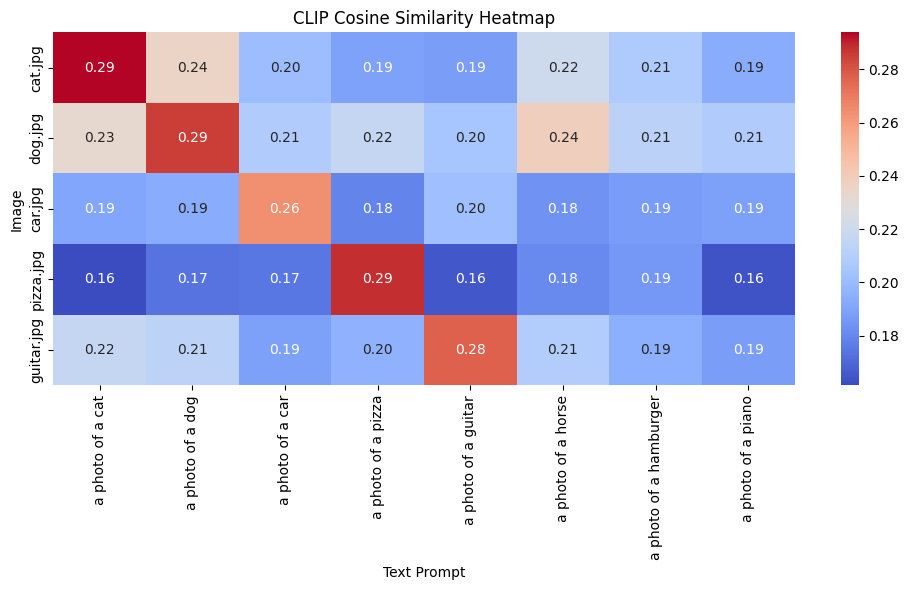

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 텍스트 & 이미지 라벨
labels = [
    "cat", "dog", "car", "pizza", "guitar"
]

# 2. similarity_matrix는 torch.Tensor → numpy로 변환
sim_matrix_np = similarity_matrix.cpu().numpy()

# 3. 히트맵 시각화
# 3. 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(sim_matrix_np,
            xticklabels=text_prompts,
            yticklabels=image_filenames,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            cbar=True)

plt.xlabel("Text Prompt")
plt.ylabel("Image")
plt.title("CLIP Cosine Similarity Heatmap")
plt.tight_layout()
plt.show()

In [9]:
# 정답 인덱스 (앞의 5개 프롬프트가 정답쌍이라고 가정)
true_indices = torch.tensor([0, 1, 2, 3, 4]).to(device)

# Top-1 prediction
pred_indices = similarity_matrix.argmax(dim=1)

# Top-1 Accuracy
accuracy = (pred_indices == true_indices).float().mean().item()
print(f"\nTop-1 Accuracy: {accuracy * 100:.2f}%")



Top-1 Accuracy: 100.00%


In [11]:
# 각 이미지별로 유사도 높은 텍스트 상위 3개 인덱스 가져오기
top3_indices = similarity_matrix.topk(3, dim=1).indices

# Top-3 Accuracy 계산
top3_correct = torch.zeros(len(true_indices)).to(device)

for i in range(len(true_indices)):
    if true_indices[i] in top3_indices[i]:
        top3_correct[i] = 1.0

top3_accuracy = top3_correct.mean().item()
print(f"Top-3 Accuracy: {top3_accuracy * 100:.2f}%")

Top-3 Accuracy: 100.00%


#CLIP의 Cosine Similarity Heatmap 결과를 보고 정답쌍과 오답쌍의 유사도 차이가 어떻게 나타났는지 분석하시오. 또한 이러한 결과가 나타난 이유를 추론해보세요.


답: 정답쌍과 유사도의 cosine similarity가 현저히 차이났다. 이는 loss를 계산할 때 contrastive loss를 통해 정답쌍의 cosine similarity는 높게 하고, 오답쌍의 유사도 차이는 낮게 하도록 학습했기 때문이다.